In [30]:
#!pip install ipympl
import numpy as np
import re
import matplotlib.pyplot as plt

# Rylan's Code

In [31]:
def matching(vertex1, vertex2):
    #Receives two vertices in the form of a tuple, and returns True
    # or False, depending on whether they match
    if vertex1[1]!=vertex2[1]:
        return False
    letters=[vertex1[0],vertex2[0]]
    letters.sort()
    if letters==['A','a'] or letters==['B','b']:
        return True
    return False

def TupleTranspose(tup):
    tup=list(tup)
    tup.reverse()
    return tuple(tup)

#Copied from ChatGPT
def format_list(L):
    if not L:
        return ""
    if len(L) == 1:
        return str(L[0])
    return f"{', '.join(map(str, L[:-1]))} and {L[-1]}"

def Find_Curves(Input):
    Output=[]
    Remaining_Chords=Input.copy()

    while len(Remaining_Chords)>0:
        chord1=Remaining_Chords.pop(0)
        curve=[chord1]

        #Check if the curve is a singleton
        if matching(chord1[0],chord1[1]):
            Output.append(curve)

        #Initialize index
        i=0
        while i<len(Remaining_Chords):
            chord2=Remaining_Chords[i]

            #increase index for next round
            i+=1
            chord_added=False
            if matching(chord1[1], chord2[0]):
                curve.append(chord2)
                chord_added=True
                #Remove from Remaining_Chords
                Remaining_Chords.pop(i-1)
                #Fix index
                i-=1
            elif matching(chord1[1], chord2[1]):
                chord2=TupleTranspose(chord2)
                curve.append(chord2)
                chord_added=True
                Remaining_Chords.pop(i-1)
                i-=1

            if chord_added:
                if matching(chord2[1],curve[0][0]):
                    Output.append(curve)
                    break
                else:
                    chord1=chord2
                    #Initialize the index again 
                    #(since a chord was added and the cycle didn't end)
                    i=0
    print('Found ',len(Output),' curves of lengths:', format_list([len(curve) for curve in Output]))
    return Output

coordinate_deltas={
('a','a') : (0,-1),
('a','A') : (0,1),
('a','b') : (-1,0),
('a','B') : (1, 0),
('b','a') : (0,-1),
('b','A') : (0,1),
('b','b') : (-1,0),
('b', 'B') : (1,0),
('A','a') : (0,-1),
('A','A') : (0,1),
('A','b') : (-1,0),
('A','B') : (1,0),
('B','a') : (0,-1),
('B','A') : (0,1),
('B','b') : (-1,0),
('B','B') : (1,0)
}

def track_coordinates(curve):
    #start at box (0,0)
    x=0; y=0
    #update for each chord
    for chord in curve:
        delta=coordinate_deltas[(chord[0][0],chord[1][0])]
        x+=delta[0]
        y+=delta[1]
    #return
    return (x,y)

# New Code

In [104]:
def read_chords(Chords_raw):
    pattern = r'([aAbB])(\d+)([aAbB])(\d+)'

    # Find all occurrences of the pattern
    Chords_found = re.findall(pattern, Chords_raw)
    Chords=[]
    for chord in Chords_found:
        if len(chord)==4:
            try:
                new_chord=((chord[0],int(chord[1])), (chord[2],int(chord[3])))
                Chords.append(new_chord)
            except:
                1+1
    print(len(Chords), ' chords recorded')
    
    #Find square sizes
    pattern_a = r'[aA](\d+)'
    pattern_b = r'[bB](\d+)'

    indices_a = re.findall(pattern_a, Chords_raw)
    indices_b = re.findall(pattern_b, Chords_raw)

    m=max([int(i) for i in indices_a]+[0])
    n=max([int(i) for i in indices_b]+[0])

    #Sort the Chords so that the letters go in increasing order a,b,A,B
    letters_order={'a':1, 'b': 2, 'A':3, 'B':4}
    #Flip each chord if necessary
    Chords_sorted=[sorted(chord,key=lambda x:(letters_order[x[0]],x[1])) for chord in Chords]
    #Order chords according to their starting point
    Chords_sorted.sort(key=lambda x: (letters_order[x[0][0]], x[0][1]))

    print('Grid of dimensions: ', m,'x',n)
    return Chords_sorted,m,n

def pretty_print_Chords(Chords, show_print=True):
    ''''
    Given chords as pairs of pairs, prints them nicely
    '''
    Chords_a=[''.join([str(s) for coord in chord for s in coord]) for chord in Chords if chord[0][0]=='a']
    Chords_b=[''.join([str(s) for coord in chord for s in coord]) for chord in Chords if chord[0][0]=='b']
    Chords_A=[''.join([str(s) for coord in chord for s in coord]) for chord in Chords if chord[0][0]=='A']
    Chords_B=[''.join([str(s) for coord in chord for s in coord]) for chord in Chords if chord[0][0]=='B']

    if show_print:
        #Pad according to longest
        max_l=max(len(Chords_a), len(Chords_b),len(Chords_A),len(Chords_B))
        Chords_a+=(max_l-len(Chords_a))*['']
        Chords_b+=(max_l-len(Chords_b))*['']
        Chords_A+=(max_l-len(Chords_A))*['']
        Chords_B+=(max_l-len(Chords_B))*['']
        rows=list(zip(Chords_a, Chords_b, Chords_A,Chords_B))
        for row in rows:
            print("{:<10} {:<10} {:<10} {:<10}".format(*row))
    else:
        return ' '.join([' '.join(Chords_a),' '.join(Chords_b),' '.join(Chords_A),' '.join(Chords_B)])

def get_point(chord_end,m,n):
    if chord_end[0].lower()=='a':
        x_coord=(chord_end[1])/(m+1)
        if chord_end[0]=='a':
            y_coord=0
        else:
            y_coord=1
            
    if chord_end[0].lower()=='b':
        y_coord=(chord_end[1])/(n+1)
        if chord_end[0]=='b':
            x_coord=0
        else:
            x_coord=1
    return (x_coord,y_coord)

def get_slopes(start,ending):
    start_slopes={'a':(0,1),
                  'b':(1,0),
                  'A':(0,-1),
                  'B':(-1,0)}
    m0=start_slopes[start]
    m1_op=start_slopes[ending]
    return m0[0],m0[1],-m1_op[0], -m1_op[1]

def get_coordinate_deltas(start,ending):
    coordinate_deltas={
        ('a','a') : (0,-1),
        ('a','A') : (0,1),
        ('a','b') : (-1,0),
        ('a','B') : (1, 0),
        ('b','a') : (0,-1),
        ('b','A') : (0,+1),
        ('b','b') : (-1,0),
        ('b', 'B') : (1,0),
        ('A','a') : (0,-1),
        ('A','A') : (0,1),
        ('A','b') : (-1,0),
        ('A','B') : (1,0),
        ('B','a') : (0,-1),
        ('B','A') : (0,1),
        ('B','b') : (-1,0),
        ('B','B') : (1,0)
        }
    return coordinate_deltas[(start,ending)]

#Given a chord, the number of chords in each axis, and a number of points N
#Returns the starting coordinates, the ending coordinates, and N points on a
#parametric cubic line joining the starting and ending coordinates. 
def get_chord_coords(chord, m, n, N=25):
    x0,y0=get_point(chord[0],m,n)
    x1,y1=get_point(chord[1],m,n)
    
    m0x,m0y, m1x, m1y= get_slopes(chord[0][0], chord[1][0])

    ax=m1x+m0x+2*x0-2*x1
    bx=3*x1-3*x0-2*m0x-m1x
    cx=m0x
    dx=x0

    ay=m1y+m0y+2*y0-2*y1
    by=3*y1-3*y0-2*m0y-m1y
    cy=m0y
    dy=y0

    t=np.linspace(0,1,N)
    x_vals=ax*t**3+bx*t**2+cx*t+dx
    y_vals=ay*t**3+by*t**2+cy*t+dy

    return ((x0,y0), (x1,y1), (x_vals,y_vals))

def plot_tesselation(Chords, m,n, max_i=1, max_j=1, include_labels=True):
    plt.figure(figsize=(2*max_i,2*max_j))
    plt.gca().set_aspect('equal', adjustable='box')
    for chord in Chords:
        (x0,y0), (x1,y1), (x_vals,y_vals)=get_chord_coords(chord,m,n)
        for i in range(max_i):
            for j in range(max_j):
                #plt.scatter([x0+i, x1+i], [y0+j, y1+j], color='red')
                plt.plot(x_vals+i, y_vals+j,color='gray')

    plt.xlim(0,max_i)
    plt.ylim(0,max_j)

    if include_labels:
        plt.text(0.5,-0.1, 'a')
        plt.text(-0.1,0.5,'b')
        plt.text(0.5,1.1, 'A')
        plt.text(1.1, 0.5, 'B')    
    plt.xticks(range(max_i))  # x-axis ticks at integers
    plt.yticks(range(max_j))  # y-axis ticks at integers (-1, 0, 1)
    plt.grid(True) 
    plt.show()

def plot_curves(Curves, m,n,Chords=[],square_size=1):
    max_i=0; min_i=0
    max_j=0; min_j=0
    for curve in Curves:
        i,j=(0,0)
        for chord in curve:
            delta=get_coordinate_deltas(chord[0][0],chord[1][0])
            max_i=max(max_i,i)
            max_j=max(max_j,j)
            min_i=min(min_i,i)
            min_j=min(min_j,j)
            i+=delta[0]
            j+=delta[1]
        coordinates=track_coordinates(curve)
            
    plt.figure(figsize=(square_size*(max_i-min_i+1),square_size*(max_j-min_j+1))) 
    plt.gca().set_aspect('equal', adjustable='box')
    for chord in Chords:
        (x0,y0), (x1,y1), (x_vals,y_vals)=get_chord_coords(chord,m,n)
        for i in range(min_i,max_i+1):
            for j in range(min_j, max_j+1):
                plt.plot(x_vals+i, y_vals+j,color='gray',linewidth=1/(abs(i)+abs(j)+1))
                
    cmap = plt.get_cmap('gist_rainbow')  # Choose a suitable colormap
    colors = cmap(np.linspace(0,1, len(Curves))) 
    for index,curve in enumerate(Curves):
        i,j=(0,0)
        for index_chord,chord in enumerate(curve):
            (x0,y0), (x1,y1), (x_vals,y_vals)=get_chord_coords(chord,m,n)
            if index_chord==0:
                plt.plot(x_vals+i, y_vals+j,color=colors[index], 
                         alpha=0.75,linewidth=max(1,4*square_size), label='Curve '+str(index+1))
            else: 
                plt.plot(x_vals+i, y_vals+j,color=colors[index], 
                         alpha=0.75,linewidth=max(1,4*square_size))
            
            delta=get_coordinate_deltas(chord[0][0],chord[1][0])
            i+=delta[0]
            j+=delta[1]
            
    plt.xlim(min_i,max_i+1)
    plt.ylim(min_j,max_j+1)
    plt.xticks(range(min_i, max_i+1))  # x-axis ticks at integers
    plt.yticks(range(min_j,max_j+1))  # y-axis ticks at integers (-1, 0, 1)
    plt.hlines([0,1],0,1,linewidth=2, color='black')
    plt.vlines([0,1],0,1,linewidth=2, color='black')
    plt.grid(True,color='black') 
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.show()

def track_coordinates_and_rectangle(curve):
    '''
    Tracks coordinates and minimal rectangle of a curve (in the order given)
    Args:
        curve: As a list of chords. 
    Returns:
        coordinates, rectangle
    '''
    max_i=0; min_i=0
    max_j=0; min_j=0
    i,j=(0,0)
    for chord in curve:
        delta=get_coordinate_deltas(chord[0][0],chord[1][0])
        max_i=max(max_i,i)
        max_j=max(max_j,j)
        min_i=min(min_i,i)
        min_j=min(min_j,j)
        i+=delta[0]
        j+=delta[1]
    return (i,j), (max_i-min_i+1,max_j-min_j+1)

def plot_one_curve(curve, m,n,Chords=[],index=1,n_curves=1, square_size=1):
    max_i=0; min_i=0
    max_j=0; min_j=0
    i,j=(0,0)
    for chord in curve:
        delta=get_coordinate_deltas(chord[0][0],chord[1][0])
        max_i=max(max_i,i)
        max_j=max(max_j,j)
        min_i=min(min_i,i)
        min_j=min(min_j,j)
        i+=delta[0]
        j+=delta[1]
    coordinates=track_coordinates(curve)
    
    print('Fundamental rectangle: (', max_i-min_i+1, 'x', max_j-min_j+1,')')
    
    cmap = plt.get_cmap('gist_rainbow')  # Choose a suitable colormap
    colors = cmap(np.linspace(0,1,n_curves))
    color=colors[index]
            
    plt.figure(figsize=(square_size*(max_i-min_i+1),square_size*(max_j-min_j+1))) 
    plt.gca().set_aspect('equal', adjustable='box')
    for chord in Chords:
        (x0,y0), (x1,y1), (x_vals,y_vals)=get_chord_coords(chord,m,n)
        thicken_chord=False
        if chord in curve or TupleTranspose(chord) in curve:
            thicken_chord=True
        for i in range(min_i,max_i+1):
            for j in range(min_j, max_j+1):
                if not thicken_chord:
                    plt.plot(x_vals+i, y_vals+j,color='gray',linewidth=0.5)
                else:
                    plt.plot(x_vals+i, y_vals+j,alpha=0.75, color=color,linewidth=1)
                
    i,j=(0,0)
    for index_chord,chord in enumerate(curve):
        (x0,y0), (x1,y1), (x_vals,y_vals)=get_chord_coords(chord,m,n)
        if index_chord==0:
            plt.plot(x_vals+i, y_vals+j,color=color, 
                     alpha=0.75,linewidth=max(1,4*square_size), label='Curve '+str(index+1))
        else: 
            plt.plot(x_vals+i, y_vals+j,color=color, 
                     alpha=0.75,linewidth=max(1,4*square_size))

        delta=get_coordinate_deltas(chord[0][0],chord[1][0])
        i+=delta[0]
        j+=delta[1]
    
    plt.xlim(min_i,max_i+1)
    plt.ylim(min_j,max_j+1)
    plt.xticks(range(min_i, max_i+1))  # x-axis ticks at integers
    plt.yticks(range(min_j,max_j+1))  # y-axis ticks at integers (-1, 0, 1)
    #plt.hlines([0,1],0,1,linewidth=2, color='black')
    #plt.vlines([0,1],0,1,linewidth=2, color='black')
    plt.grid(True,color='black') 
    #plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.show()

def Find_Fundamental_Rectangles(curve, m,n, index_curve=0, Chords=[],n_curves=1, square_size=1, show_plot=True):
    rectangle_dimensions=[]
    all_coordinates=[]
    for i in range(len(curve)):
        coordinates,rectangle=track_coordinates_and_rectangle(curve[i:]+curve[:i])
        rectangle_dimensions.append((i,rectangle))
        all_coordinates.append(coordinates)
    
    min_x=sorted(rectangle_dimensions, key=lambda x: x[1][0])[0]
    min_y=sorted(rectangle_dimensions, key=lambda x: x[1][1])[0]
    
    max_x=sorted(rectangle_dimensions, key=lambda x: x[1][0],reverse=True)[0]
    max_y=sorted(rectangle_dimensions, key=lambda x: x[1][1],reverse=True)[0]
    
    print('Extremal Fundamental Rectangles:')
    labels=['\n_____Minimum x_____', '\n_____Maximum x_____', '\n_____Minimum y_____', '\n_____Maximum y_____']
    for i,pair in enumerate([min_x, max_x,min_y, max_y]):
        start_index=pair[0]
        print(labels[i],'\nStarting Index: ', start_index, '\nSlope: ', all_coordinates[start_index])
        if show_plot:
            plot_one_curve(curve[start_index:]+curve[:start_index], m,n,Chords,
                       index=index_curve, n_curves=n_curves, square_size=square_size)
    print('-------------')
    print('Range in x: ', max_x[1][0]-min_x[1][0], ', Range in y: ', max_y[1][1]-min_y[1][1])
    print('All found Fundamental Rectangles:')
    rectangle_dimensions.sort(key=lambda x: x[1])
    print(''.join(['('+str(x[1][0])+' x '+str(x[1][1])+')\t' for x in rectangle_dimensions]))

def get_torus_coord(xs,ys,r=1, R=2):
    new_xs= (R+r*np.cos(2*np.pi*xs))*np.cos(2*np.pi*ys)
    new_ys= (R+r*np.cos(2*np.pi*xs))*np.sin(2*np.pi*ys)
    new_zs= r*np.sin(2*np.pi*xs)
    return new_xs, new_ys, new_zs 
    
def plot_torus_curves(Curves, r=1, R=2):
    # Create figure and 3D axes
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Define parametric equations for the surface
    xs,ys= np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))
    
    x,y,z=get_torus_coord(xs,ys,r,R)
    
    # Plot the surface
    ax.plot_surface(x, y, z, color='#e6e6e6', alpha=0.3)
    
    #Get colors
    cmap = plt.get_cmap('gist_rainbow')  # Choose a suitable colormap
    colors = cmap(np.linspace(0,1,len(Curves)))
    
    #Plot Curves
    for index,curve in enumerate(Curves):
        for chord in curve:
            _,_,coords=get_chord_coords(chord, m,n)
            x,y,z=get_torus_coord(coords[0],coords[1],1.01*r, R)
            ax.plot3D(x, y, z, color=colors[index])
    
    # Set labels
    ax.set_xlim(-(R+1), R+1)
    ax.set_ylim(-R-1, R+1)
    ax.set_zlim(-r-1, r+1)
    
    # Show the plot
    ax.set_axis_off()
    plt.show()

def get_long_example(height=2):
    height=height-1
    start=height+1
    ups=[[('a',start+2*i), ('A', start+2+2*i)] for i in range(height)]
    loop1=[[('a',start+2*height), ('a',start+1+2*height)]]
    downs=[[('A', start+1+2*i),('a', start+1+2*(i-1))] for i in range(height,0,-1)]
    loop2=[[('A', start+1), ('A',start+2+2*height)], [('a',start+2+2*height),('A',1)]]
    closing=[[('a',i+1),('A',i+2)] for i in range(height)]
    Chords_raw=pretty_print_Chords(ups+loop1+downs+loop2+closing,show_print=False)
    return Chords_raw

# Examples

In [202]:
#Various Example inputs

#Easy examples
#Chords_raw='A3a1 a2B2 a4a6 a8b2 b4A4 b8b6 A2A8 A6B4  b1a5 a3A5 B6B8 b5A1 B1B5 a7B7 b7A7 a9A9 b9b10 A10A11 a10B10 a11B9'
#Chords_raw='a5B4 a4A1 a3B3 a2A5 a1b4 b3b1 b2A3 A2A4 B1B2'
#Chords_raw='a5a1 a4a2 a3A3 b7B1 b6b5 b4b3 b2b1 A1A5 A2A4 B2B3 B4B5 B6B7'
#Chords_raw='''a10b10 a9b3 a8a4 a7a3 a6a2 a5a1 b1b11 b2B11 b4B9 b5b6 b7b8 b9B4 b12B1 A1A8 A2A5 A3A6 A4A7 A9A10 B12B6 B10B7 B8B3 B5B2'''

#Example where Fundamental Rectangle changes
#Chords_raw='a1a6 a2a7 a3a8 a4B5 a5b4 a9b5 b1b6 b2b7 b3b8 A1A5 A2A6 A3A7 A4A8 A9B1 B2B6 B3B7 B4B8'

#Engineered Examples where Fundamental Rectangle changes a lot
#Chords_raw='a1A7 a2A8 a3A9 a4a5 A6a7 a8a9 A1A2 A3A4 A5a6'
#Chords_raw='a1A2 a2a3 a4A3 a5A4 a6A5 a7A6 a8A7 a9A1 A8A9'
Chords_raw='a1A2  b1B2  A8A9  B8B9 a2a3  b2b3 a4A3  b4B3 a5A4  b5B4 a6A5  b6B5 a7A6  b7B6 a8A7  b8B7 a9b9  A1B1'
#Chords_raw='a1A2 a2a3 a4A3 a5A4 a6A5 a7A6 a8A7 a9A1 A8A9'

#Chords_raw='a1A4 A2A3 a2A5 a3A1 a4a5'
#Chords_raw='a2A4 a4A6 a6a7 A7a5 A5a3 A3A8 a8A1 a1A2'
#Chords_raw='a4A6 a6A8 a8A10 a10a11 A11a9 A9a7 A7a5 A5A12 a12A1 a1A2 a2A3 a3A4'
Chords_raw=get_long_example(height=10)
Chords_raw=Chords_raw.replace('a','b').replace('A', 'B')

30  chords recorded
Grid of dimensions:  0 x 30
Chords in order:
           b1B2                  B11B30    
           b2B3                            
           b3B4                            
           b4B5                            
           b5B6                            
           b6B7                            
           b7B8                            
           b8B9                            
           b9B10                           
           b10B12                          
           b11B13                          
           b12B14                          
           b13B15                          
           b14B16                          
           b15B17                          
           b16B18                          
           b17B19                          
           b18B20                          
           b19B21                          
           b20B22                          
           b21B23                          
           

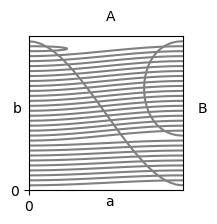

In [203]:
%matplotlib inline
Chords,m,n=read_chords(Chords_raw)
print('Chords in order:')
pretty_print_Chords(Chords)
plot_tesselation(Chords,m,n,1,1)

In [204]:
#plot_one_curve(Curves[0],m,n,Chords, index=0,square_size=2)

Found  1  curves of lengths: 30


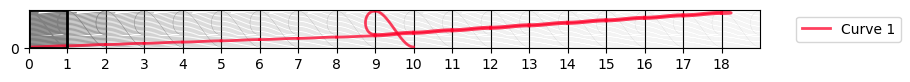

In [205]:
Curves=Find_Curves(Chords)
plot_curves(Curves, m,n,Chords,square_size=0.5)

Extremal Fundamental Rectangles:

_____Minimum x_____ 
Starting Index:  8 
Slope:  (10, 0)
Fundamental rectangle: ( 11 x 1 )


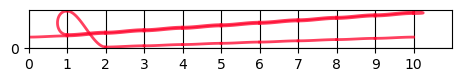


_____Maximum x_____ 
Starting Index:  19 
Slope:  (10, 0)
Fundamental rectangle: ( 21 x 1 )


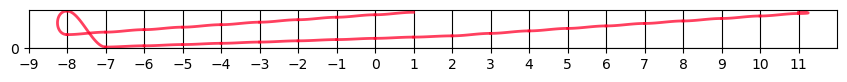


_____Minimum y_____ 
Starting Index:  0 
Slope:  (10, 0)
Fundamental rectangle: ( 19 x 1 )


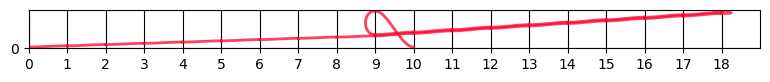


_____Maximum y_____ 
Starting Index:  0 
Slope:  (10, 0)
Fundamental rectangle: ( 19 x 1 )


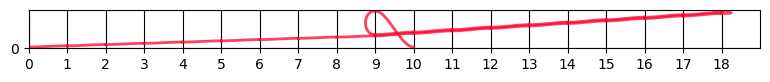

-------------
Range in x:  10 , Range in y:  0
All found Fundamental Rectangles:
(11 x 1)	(11 x 1)	(12 x 1)	(12 x 1)	(13 x 1)	(13 x 1)	(14 x 1)	(14 x 1)	(15 x 1)	(15 x 1)	(16 x 1)	(16 x 1)	(17 x 1)	(17 x 1)	(18 x 1)	(18 x 1)	(19 x 1)	(19 x 1)	(20 x 1)	(20 x 1)	(21 x 1)	(21 x 1)	(21 x 1)	(21 x 1)	(21 x 1)	(21 x 1)	(21 x 1)	(21 x 1)	(21 x 1)	(21 x 1)	


In [206]:
#Minimal Rectangles may change
index_curve=0
curve=Curves[index_curve]
Find_Fundamental_Rectangles(curve, m,n, index_curve, [], len(Curves),0.5,show_plot=True)

Curve  1 
Slope:  (3, -3)
Fundamental rectangle: ( 7 x 7 )


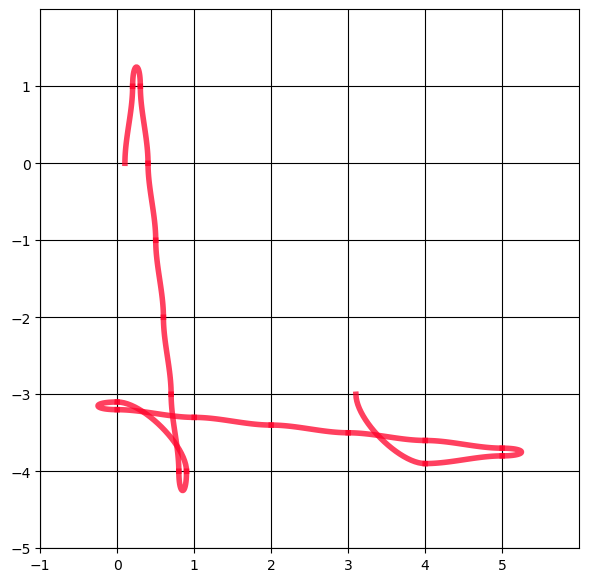

Reversed 
Slope:  (-3, 3)
Fundamental rectangle: ( 7 x 7 )


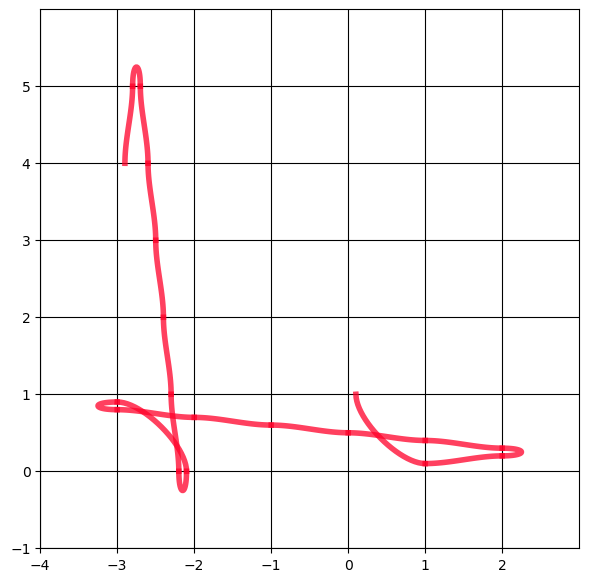

In [192]:
#Review curve going forward or backward
start_index=0

curve_moved=curve[start_index:]+curve[:start_index]
coordinates=track_coordinates(curve_moved)
print('Curve ', index_curve+1,'\nSlope: ', coordinates)
plot_one_curve(curve_moved, m,n,[],index=index_curve, n_curves=len(Curves))
curve_rev=[TupleTranspose(chord) for chord in curve_moved]
curve_rev.reverse()
coordinates=track_coordinates(curve_rev)
print('Reversed' ,'\nSlope: ', coordinates)
plot_one_curve(curve_rev, m,n,[],index=index_curve, n_curves=len(Curves))

In [126]:
#Plot curves on a Torus
#Uncomment next to make it interactive
#%matplotlib ipympl
#plot_torus_curves(Curves)

Curve-> Algorithm to get an encompassing Rectangle (x,y). 
If (X,Y) are the minimum dimensions of an encompassing Rectangle => X<= 2x (+-1?), Y<=2y (+-1)

# MyPackage

A simple example Python package that contains a few utility functions.

## Installation

To install this package, run:

```bash
pip install -e package_folder